# Text Classification

In [21]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
from sklearn.model_selection import train_test_split
import pickle

In [7]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\amish\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [8]:
train_df = pd.read_csv("../data/train.csv")

In [9]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [10]:
X = train_df['text']

In [11]:
y = train_df['target']

In [12]:
X.head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

# Text Preprocessing

In [13]:
def preprocess_text(input_text, use_stemming=True, use_lemmatization=True):
    # Convert to lowercase
    preprocessed_text = input_text.lower()
    
    # Remove punctuation
    preprocessed_text = re.sub(r'[^\w\s]', '', preprocessed_text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(preprocessed_text)
    filtered_words = [word for word in word_tokens if word not in stop_words]
    
    # Initialize stemmer and lemmatizer
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    
    # Optionally apply stemming and lemmatization
    if use_stemming:
        filtered_words = [stemmer.stem(word) for word in filtered_words]
    if use_lemmatization:
        filtered_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    
    preprocessed_text = ' '.join(filtered_words)
    
    return preprocessed_text


In [14]:
X_preprocessed = [preprocess_text(text) for text in X]

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [24]:
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))

6090
6090
1523
1523


# Train model

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_val_vectors = vectorizer.transform(X_val)


In [26]:
# Save the CountVectorizer to a pickle file
vectorizer_filename = '../ref/vectorizer.pkl'
with open(vectorizer_filename, 'wb') as file:
    pickle.dump(vectorizer, file)

In [27]:
X_train_vectors

<6090x16621 sparse matrix of type '<class 'numpy.int64'>'
	with 58695 stored elements in Compressed Sparse Row format>

In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vectors, y_train)


LogisticRegression()

In [29]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_val_vectors)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy}")


Validation Accuracy: 0.7912015758371634


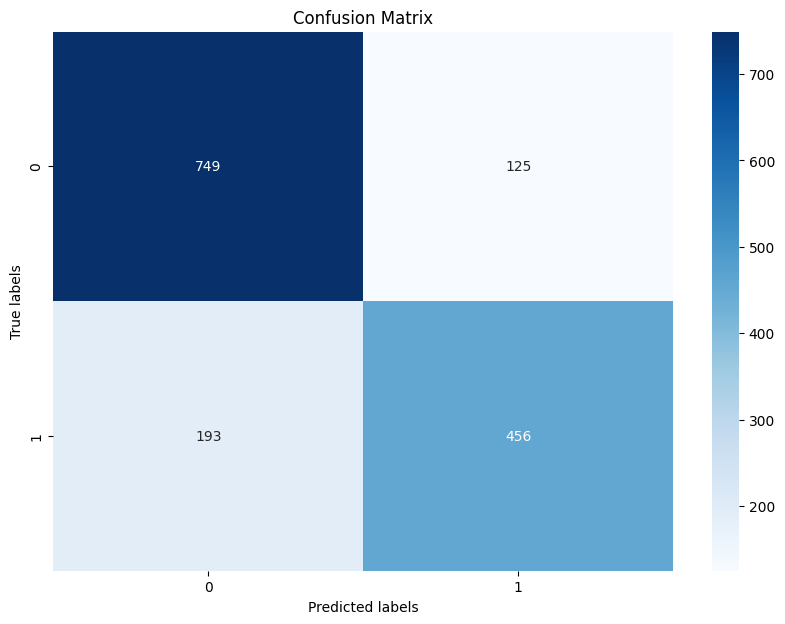

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_pred contains your model predictions and y_val contains the true labels
conf_matrix = confusion_matrix(y_val, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision
precision = precision_score(y_val, y_pred, average='binary')
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_val, y_pred, average='binary')
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(y_val, y_pred, average='binary')
print(f"F1 Score: {f1}")


Precision: 0.7848537005163512
Recall: 0.7026194144838213
F1 Score: 0.7414634146341463


In [32]:
model_filename = '../ref/model.pkl'  # Path where the model will be saved

# Save the model as a pickle file
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {model_filename}")



Model saved to ../ref/model.pkl
